<div class="text-cell-section-header">
<h1 style="text-align: center;"><strong>PROGRAMACI&Oacute;N PARA EL AN&Aacute;LISIS DE DATOS</strong></h1>
</div>
<h1 style="text-align: center;"><strong>Unidad 3 - Exploración y Visualización de Datos</strong></h1>
<h1 style="text-align: center;"><strong>PRESENTADO POR: DARWIN MERCADO</strong></h1>
<h1 style="text-align: center;"><strong>GRUPO 203008069_3</strong></h1>
<h1 style="text-align: center;"><strong>PRESENTADO A: FELIPE ALEXANDER PIPICANO GUZMAN</strong></h1>
<h1 style="text-align: center;"><strong>Universidad Nacional Abierta y a Distancia &ndash; UNAD</strong></h1>
<h1 style="text-align: center;"><strong>22 de noviembre de 2023</strong></h1>

# Introducción

En el siguiente trabajo se va a estudiar el rendimiento academico de manera general de los estudiantes que presentaron las pruebas saber pro en el año 2022, las cuales son las conocidas pruebas ECAES que son un requisito para poder obtener el grado como profesional en las diferentes Universidades o instituciones universitarias en el pais de Colombia.

**LINK A ONE DRIVE DE LA BASE DE DATOS https://drive.google.com/file/d/1jpN0CRAgVj6nlSJHvOgkDgLb_BtHyp8C/view?usp=sharing**

# Objetivo General

- En el siguiente trabajo se va a estudiar el rendimiento academico de los estudiantes que presentaron las pruebas saber pro en el año 2022, las cuales son las conocidas pruebas ECAES que son un requisito para poder obtener el grado como profesional en las diferentes Universidades o instituciones universitarias en el pais de Colombia.

## Objetivos especificos

- Se cargará la base de datos del ICFES y se va a utilizar python para la limpieza de datos faltantes o con errores de tipografía.

- Se van a definir variables categoricas y númericas que serán utilizadas, con las cuales se va a definir los datos especificos con los cuales se va a trabajar, dado que la base de datos contiene 109 columnas de las cuales solo se utilizarán las más especificas.

- Se desarrollaran sobre las variables definidas las metricas descriptivas.

- Se desarrollará una matriz de correlación para las variables númericas para poder visualizar cuales tienen una mayor correlación entre sí.

- Se categorizará una variable categórica para definir un rango especifico con el cuál sea más facil para trabajar.

- Desarrollar gráficos cientificos para análizar a profundidad nuestros datos y comparar los resultados.

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
icfes = pd.read_csv("DATA_ICFES_SABERPROPROFESIONAL_2022-2.TXT", sep= "¬",engine='python')

In [10]:
icfes.head()

,ESTU_TIPODOCUMENTO,ESTU_NACIONALIDAD,ESTU_GENERO,ESTU_FECHANACIMIENTO,ESTU_EXTERIOR,PERIODO,ESTU_CONSECUTIVO,ESTU_ESTUDIANTE,ESTU_PAIS_RESIDE,ESTU_TIENEETNIA,...,MOD_COMUNI_ESCRITA_DESEM,MOD_COMUNI_ESCRITA_PNAL,MOD_COMUNI_ESCRITA_PNBC,PUNT_GLOBAL,PERCENTIL_GLOBAL,PERCENTIL_NBC,ESTU_INSE_INDIVIDUAL,ESTU_NSE_INDIVIDUAL,ESTU_NSE_IES,ESTU_ESTADOINVESTIGACION
0,CE,ECUADOR,M,24/12/1998,NO,20225,EK202250120952,ESTUDIANTE,ECUADOR,No,...,3.0,81,82,174,86,86,52.304299,2.0,3,PUBLICAR
1,CC,COLOMBIA,F,11/09/2001,NO,20225,EK202250088428,ESTUDIANTE,COLOMBIA,No,...,3.0,74,76,152,59,76,57.241157,3.0,2,PUBLICAR
2,CC,COLOMBIA,M,10/09/2001,NO,20225,EK202250166006,ESTUDIANTE,COLOMBIA,No,...,3.0,76,82,151,59,72,48.394707,2.0,2,PUBLICAR
3,CC,COLOMBIA,F,16/03/1993,NO,20225,EK202250101378,ESTUDIANTE,COLOMBIA,No,...,2.0,28,29,122,19,31,34.324772,1.0,4,PUBLICAR
4,CC,COLOMBIA,M,26/06/1996,NO,20225,EK202250179845,ESTUDIANTE,COLOMBIA,No,...,1.0,14,10,134,34,13,42.049505,1.0,2,PUBLICAR


***Se definirán las variables categoricas que se utilizarán del dataset inicial, que son las de interés para el desarrollo del analisis exploratorio de estos datos***

In [11]:
Cat_type = icfes[["ESTU_EXTERIOR","ESTU_MCPIO_RESIDE","ESTU_AREARESIDE","ESTU_SEMESTRECURSA","ESTU_COMOCAPACITOEXAMENSB11","FAMI_TIENEINTERNET","FAMI_TIENECOMPUTADOR","ESTU_PRGM_ACADEMICO","FAMI_ESTRATOVIVIENDA"]]

In [12]:
# Se verifica la información del dataset categorico para definir que datos se podrían limpiar
Cat_type.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127342 entries, 0 to 127341
Data columns (total 9 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   ESTU_EXTERIOR                127342 non-null  object
 1   ESTU_MCPIO_RESIDE            127332 non-null  object
 2   ESTU_AREARESIDE              125284 non-null  object
 3   ESTU_SEMESTRECURSA           125148 non-null  object
 4   ESTU_COMOCAPACITOEXAMENSB11  125273 non-null  object
 5   FAMI_TIENEINTERNET           121645 non-null  object
 6   FAMI_TIENECOMPUTADOR         121179 non-null  object
 7   ESTU_PRGM_ACADEMICO          127342 non-null  object
 8   FAMI_ESTRATOVIVIENDA         121811 non-null  object
dtypes: object(9)
memory usage: 8.7+ MB


***Como se observa se tiene que las variables mas importantes como lo son el programa academico, si es estudiante en el exterior y el municio donde reside no tienen datos nulos o tienen muy pocos datos nulos, por lo tanto se verificará inicialmente***

In [13]:
Cat_type["FAMI_TIENEINTERNET"].unique()

array(['Si', 'No', nan], dtype=object)

In [14]:
Cat_type["FAMI_ESTRATOVIVIENDA"].unique()

array(['Estrato 3', 'Estrato 1', 'Estrato 2', nan, 'Estrato 5',
       'Estrato 6', 'Estrato 4', 'Sin Estrato'], dtype=object)

In [15]:
 Cat_type["FAMI_TIENECOMPUTADOR"].unique()

array(['Si', 'No', nan], dtype=object)

In [16]:
Cat_type["ESTU_AREARESIDE"].unique()

array(['Cabecera Municipal', 'Area Rural', nan], dtype=object)

In [17]:
Cat_type = Cat_type.dropna()

***Se eliminaron los datos nulos dado que al estar trabajando en un dataset con datos únicos por persona no es coherente utilizar otros métodos***

In [18]:
Cat_type.info()

<class 'pandas.core.frame.DataFrame'>
Index: 118948 entries, 0 to 127341
Data columns (total 9 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   ESTU_EXTERIOR                118948 non-null  object
 1   ESTU_MCPIO_RESIDE            118948 non-null  object
 2   ESTU_AREARESIDE              118948 non-null  object
 3   ESTU_SEMESTRECURSA           118948 non-null  object
 4   ESTU_COMOCAPACITOEXAMENSB11  118948 non-null  object
 5   FAMI_TIENEINTERNET           118948 non-null  object
 6   FAMI_TIENECOMPUTADOR         118948 non-null  object
 7   ESTU_PRGM_ACADEMICO          118948 non-null  object
 8   FAMI_ESTRATOVIVIENDA         118948 non-null  object
dtypes: object(9)
memory usage: 9.1+ MB


In [19]:
Cat_type.describe()

,ESTU_EXTERIOR,ESTU_MCPIO_RESIDE,ESTU_AREARESIDE,ESTU_SEMESTRECURSA,ESTU_COMOCAPACITOEXAMENSB11,FAMI_TIENEINTERNET,FAMI_TIENECOMPUTADOR,ESTU_PRGM_ACADEMICO,FAMI_ESTRATOVIVIENDA
count,118948,118948,118948,118948,118948,118948,118948,118948,118948
unique,1,977,2,12,3,2,2,837,7
top,NO,BOGOTÁ D.C.,Cabecera Municipal,09,Repasó por cuenta propia,Si,Si,DERECHO,Estrato 2
freq,118948,30106,105153,39500,81170,105059,104434,7485,41071


***En esta tabla de métricas obtenidas para las variables cualitativas, podemos observar temas muy valioso, como lo es que la mayoría de estudiantes no son extranjeros, adicional a esto el municipio que mayor participación tuvo fue BOGOTA en el cual participaron 30106 estudiantes casí un 25% del total, adicional a esto vemos que la mayoría de estudiantes son de cabecera municipal osea que viven cerca de los municipios y no aledaños, la mayoría de los participantes están en 9no semestre de la universidad, adicional se puede ver que más del 60% de los estudiantes repasaron por cuenta propia, que es una información valiosa dado que hoy en día se pueden encontrar variedad de ofertas para hacer cursos PreIcfes, luego vamos a una de las variables más importantes y es que haya acceso al internet, casí el 90% tienen acceso a este apoyo, pero los otros 10% si se ven afectados, dado que para tener acceso a las herramientas de estudio deben de ir a bibliotecas cercanas o buscar información directamente en las instituciones. La mayoría tienen computador, pero es una variable no tan signficativa dado que hoy en día la mayoría de Universidades tienen accesos a este tipo de equipamentos de manera gratuita. También se tiene que la mayoría de estudiantes estudian la carrera de DERECHO casualmente, pero si miramos cuantas carreras profesionales hay en curso son 8236, lo que signfica que ese dato no tiene una relevancia tan significativa dado que son muchas carreras presentes. Por último se encontró que la mayoría de estudiantes son de estrato 2, lo cual se identifica como personas con recursos medios y que tienen ingresos básicos a su hogar.***

***Se definirán las variables númericas de interés para trabajar en nuestro analisis exploratorio***

In [13]:
num_type = icfes[["MOD_RAZONA_CUANTITAT_PUNT","MOD_LECTURA_CRITICA_PUNT","MOD_COMPETEN_CIUDADA_PUNT","MOD_INGLES_PUNT","MOD_COMUNI_ESCRITA_PUNT","PUNT_GLOBAL","PERCENTIL_GLOBAL","PERCENTIL_NBC"]]

In [14]:
num_type.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127342 entries, 0 to 127341
Data columns (total 8 columns):
 #   Column                     Non-Null Count   Dtype
---  ------                     --------------   -----
 0   MOD_RAZONA_CUANTITAT_PUNT  127342 non-null  int64
 1   MOD_LECTURA_CRITICA_PUNT   127342 non-null  int64
 2   MOD_COMPETEN_CIUDADA_PUNT  127342 non-null  int64
 3   MOD_INGLES_PUNT            127342 non-null  int64
 4   MOD_COMUNI_ESCRITA_PUNT    127342 non-null  int64
 5   PUNT_GLOBAL                127342 non-null  int64
 6   PERCENTIL_GLOBAL           127342 non-null  int64
 7   PERCENTIL_NBC              127342 non-null  int64
dtypes: int64(8)
memory usage: 7.8 MB


***Se verificará con la variable .describe() los datos estadisticos generales de todas las variables númericas, con esto poder tener una idea del comportamiento de los datos***

In [15]:
num_type.describe()

,MOD_RAZONA_CUANTITAT_PUNT,MOD_LECTURA_CRITICA_PUNT,MOD_COMPETEN_CIUDADA_PUNT,MOD_INGLES_PUNT,MOD_COMUNI_ESCRITA_PUNT,PUNT_GLOBAL,PERCENTIL_GLOBAL,PERCENTIL_NBC
count,127342.000000,127342.000000,127342.000000,127342.000000,127342.000000,127342.000000,127342.000000,127342.000000
mean,145.980431,151.395887,143.038228,156.661557,131.881744,145.791695,50.391780,50.328423
std,32.979071,31.707712,34.970227,35.824786,49.559399,27.001916,28.868851,28.881283
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,122.000000,129.000000,119.000000,135.000000,119.000000,128.000000,25.000000,25.000000
50%,146.000000,152.000000,143.000000,156.000000,137.000000,145.000000,50.000000,50.000000
75%,169.000000,174.000000,168.000000,178.000000,162.000000,164.000000,75.000000,75.000000
max,300.000000,300.000000,300.000000,300.000000,300.000000,278.000000,100.000000,100.000000


***En esta tabla obtenida de las variables númericas definidas se puede observar los diferentes rangos posibles de los puntajes, teniendo su valor minimo y máximo, los cuartiles definidos, el conteo de la cantidad de datos que tenemos, el promedio en el cual se repiten los datos y su desviación estándar. Dado que se busca analizar el rendimiento academico de los estudiantes si revisamos en el puntaje global podemos observar algo y es que el puntaje promedio de todos los estudiantes fue de 145 puntos de un valor máximo de 500 puntos, teniendo así que este promedio es un 29% del puntaje total que se puede obtener, con esto se puede tener una visualización bastante critica, dado que es un porcentaje bastante bajo y es poco esperado para este tipo de pruebas. Adicional a esto el percentil global tiene un promedio de 50 puntos el cual es bastante bajo y es un percentil que es esperado dado que el puntaje global fue bastante bajo el cual es un comparativo del puntaje de cada estudiante vs el resto del país***

In [31]:
num_type.corr()

,MOD_RAZONA_CUANTITAT_PUNT,MOD_LECTURA_CRITICA_PUNT,MOD_COMPETEN_CIUDADA_PUNT,MOD_INGLES_PUNT,MOD_COMUNI_ESCRITA_PUNT,PUNT_GLOBAL,PERCENTIL_GLOBAL,PERCENTIL_NBC
MOD_RAZONA_CUANTITAT_PUNT,1.000000,0.612623,0.555832,0.470267,0.251821,0.749420,0.742034,0.660769
MOD_LECTURA_CRITICA_PUNT,0.612623,1.000000,0.721000,0.502314,0.290180,0.811115,0.798833,0.744288
MOD_COMPETEN_CIUDADA_PUNT,0.555832,0.721000,1.000000,0.555992,0.259803,0.807061,0.793251,0.743580
MOD_INGLES_PUNT,0.470267,0.502314,0.555992,1.000000,0.204179,0.717214,0.677747,0.608750
MOD_COMUNI_ESCRITA_PUNT,0.251821,0.290180,0.259803,0.204179,1.000000,0.618184,0.581615,0.581912
PUNT_GLOBAL,0.749420,0.811115,0.807061,0.717214,0.618184,1.000000,0.967742,0.904002
PERCENTIL_GLOBAL,0.742034,0.798833,0.793251,0.677747,0.581615,0.967742,1.000000,0.927044
PERCENTIL_NBC,0.660769,0.744288,0.743580,0.608750,0.581912,0.904002,0.927044,1.000000


***Se muestra gráficamente la correlación de las variables númericas y así poder encontrar cuales tienen mayor correlación una a la otra***

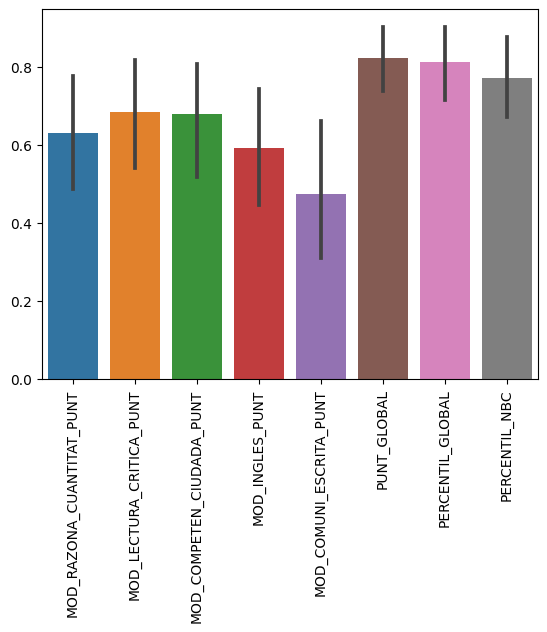

In [32]:
sns.barplot(num_type.corr())
plt.xticks(rotation=90)
plt.show()

***Las variables que más se relacionan son "PUNT_GLOBAL" , "PERCENTIL_GLOBAL" y "PERCENTIL_NBC"***

***Dado que se está trabajando con una base de datos del ICFES SaberPro 2022, podemos decir que las variables que más se relaciona se dá porque se llevan una y otra de la mano, quiere decir que son variables que se necesitan la una a la otra para poder arrojar un resultado en general y verificar el rendimiento de las pruebas a nivel nacional de cada uno de los estudiantes, dando datos especificos como el rendimiento individual a nivel de puntaje global, el rendimiento individual con su puntaje vs el resto del país (Percentil Global) y el nucleo básico de conocimiento***

***Se va a realizar un diagrama de boxplot para revisar el comportamiento general de los datos y si se tiene algún dato atipico y sus cuartiles de cada una de las variables***

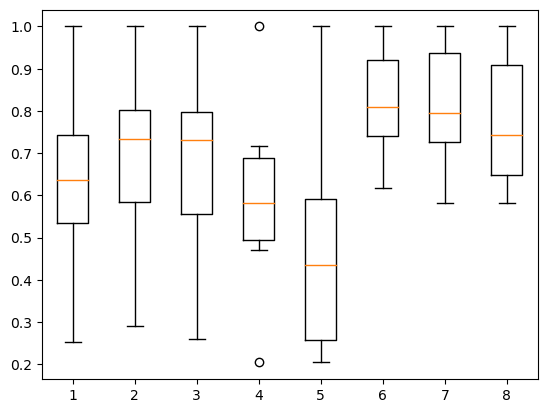

In [18]:
plt.boxplot(num_type.corr())
plt.show()

***En este gráfico de barplot se puede observar que el modulo de comunicación escrita tuvo un puntaje muy bajo en cuanto a las diferentes variables que conllevan a un buen resultado, teniendo así que es donde peor le fue a los estudiantes en la prueba Saber Pro 2022, adicional a esto en el módulo de inglés se observan un par de datos atipicos, esto puede darse por la diferencia de resultados entre los estudiantes.***

In [16]:
num_type["MOD_INGLES_PUNT"].unique()

array([187, 163, 176, 114, 145, 192, 143, 173,   0, 141, 125, 138, 111,
       133, 105, 150, 146, 139, 134, 154, 215, 142, 201, 122, 166, 156,
       129, 119, 113, 194, 152, 149, 171, 101, 161, 136, 174, 127, 165,
       170, 126, 162, 177, 211, 144, 140, 157, 213, 218, 175,  89, 172,
       300, 193, 160, 184, 188, 185, 130, 164, 155, 186, 121, 132, 151,
       128, 169, 182, 158, 148, 222, 115, 181, 135, 116, 206, 117, 200,
       217, 153, 123, 159, 180, 219, 147, 202, 131, 210, 214, 118, 197,
       195, 137, 178, 196, 106, 168, 179,  86, 204,  99, 205, 190,  79,
       199, 203, 183,  95, 189, 216, 208, 102, 212, 167, 110, 198, 104,
       207, 191, 230, 100, 108, 231, 209, 112, 124, 120, 220, 225, 107,
        91,  97, 103, 221,  90,  98,  88, 109,  85,  96, 223,  92,  94,
        81, 224, 227,  80,  82, 226,  83,  93,  77, 228,  87,  84,  78,
       229], dtype=int64)

• **Para poder verificar una de las variables más impactantes en el rendimiento academico sobre la prueba realizada, se va a realizar un gráfico tipo pie para poder verificar el porcentaje de estudiantes que tuvo algún tipo de capacitación y si realmente es una variable o carácteristica importante para obtener un buen resultado.**

In [58]:
Cat_type["ESTU_COMOCAPACITOEXAMENSB11"].unique() ## Verificamos los datos que vamos a obtener de como se capacitaron

array(['Repasó por cuenta propia', 'Tomó un curso de preparación',
       'No realizó ninguna prueba de preparación'], dtype=object)

In [41]:
# Se desarrolla dos listas con los colores y los titulos de nuestro pie chart
colores = ["green","red","blue","blue","yellow"]
titulos = ['Repasó por cuenta propia', 'Tomó un curso de preparación',
       'No realizó ninguna prueba de preparación']

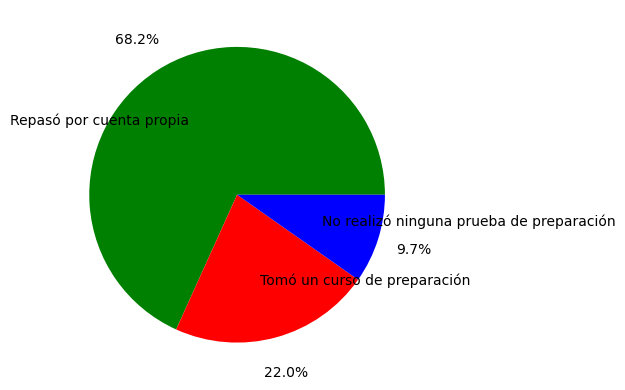

In [43]:
# Se gráfica el pie char usando el conteo de los valores que tenemos
plt.pie(Cat_type["ESTU_COMOCAPACITOEXAMENSB11"].value_counts(), colors=colores, labels =titulos,autopct='%1.1f%%',
       pctdistance=1.25, labeldistance=.6)
plt.show()

***Se puede observar que el 68.3% de los estudiantes prefirieron estudiar por cuenta propia, dado que teniendo en cuenta los costos que tienen tomar un curso de preparación es lógico que prefieran hacerlo por cuenta propia, ya que si verificamos inicialmente su estrato socioeconómico esta mayoría pertenece a estrato 2 y es una variable siginificativa en cuanto a temas monetarios para estas preparaciones, dado que se debe de tener en cuenta que estos estudiantes deben de pagar el semestre y sus gastos universitarios en general, el 22.1% que tomó el curso de preparación no necesariamente se debe a que sea de un mayor estrato socioeconómico, pero se tiene una menor cuantía, se debe de verificar en un analisis más profundo la relación entre estas variables y el resultado academico, dado que nos podría dar una gradiosa conclusión de sí realmente funcionan este tipo de cursos o no.***

• **Se realizará un scatter plot, con el cual se va a analizar el comportamiento de las variables númericas y si gráficamente se ve una distribución de puntos entre ellas.**

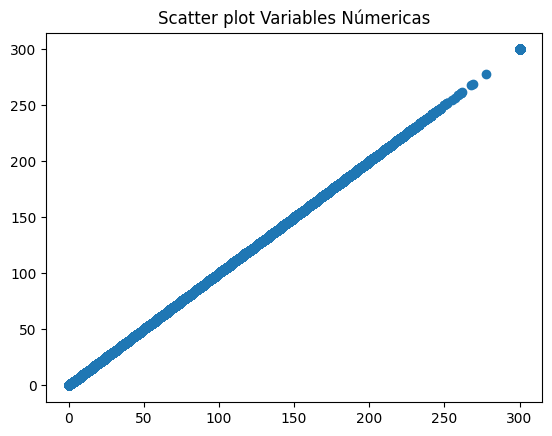

In [71]:
plt.scatter(icfes[["MOD_RAZONA_CUANTITAT_PUNT","MOD_LECTURA_CRITICA_PUNT","MOD_COMPETEN_CIUDADA_PUNT","MOD_INGLES_PUNT","MOD_COMUNI_ESCRITA_PUNT","PUNT_GLOBAL","PERCENTIL_GLOBAL","PERCENTIL_NBC"]],num_type)
plt.title("Scatter plot Variables Númericas")
plt.show()

***En este gráfico se puede observar que los datos que estamos estudiando tienen una similitud y un comportamiento bastante ideal, y es lo que se espera dado que casí todos los resultados van en crecimiento de más de 100 y hasta 500, otros llegan hasta el 100 y por lo tanto su comportamiento gráfico es lo esperado.***

***De el dataset inicial icfes se tomó la variable Percentíl Global, la cual es una variable continua al tener números que pueden ir desde el 1 a el 100, en el cuál pueden tomar cualquier valor dependiendo el rendimiento del estudiante, por lo tanto es una variable ideal para categorizar y poder presentar de manera más sencilla que significa cada percentíl a el que pertenece el resultado de cada estudiante***

In [31]:
# Inicialmente se determinan los intervalos y las categorías que se van a utilizar
intervalos = [1,20,40,60,80,100]
categorias = ["Muy bajo", "Bajo", "Medio", "Alto", "Muy Alto"]

In [32]:
# Luego se crea una columna nueva en nuestro dataset y adicional a esto se usa la función pd.cut el cual según la documentación de pandas nos sirve para realizar la converción de continua a categorica
icfes["Categorias_Percentil_Global"] = pd.cut(icfes["PERCENTIL_GLOBAL"], bins = intervalos, labels = categorias)
print(icfes["Categorias_Percentil_Global"])

0         Muy Alto
1            Medio
2            Medio
3         Muy bajo
4             Bajo
            ...   
127337        Bajo
127338        Bajo
127339        Alto
127340        Alto
127341        Alto
Name: Categorias_Percentil_Global, Length: 127342, dtype: category
Categories (5, object): ['Muy bajo' < 'Bajo' < 'Medio' < 'Alto' < 'Muy Alto']


***Se propuso esta estandarización, debido a que los datos tienen cinco segmentos de datos, en los cuales se determinan los puntajes, muy bajo, bajo, medio, alto y muy alto, con esto poder determinar como le fue a los estudiantes en su percentil global y que pueda haber un entendimiento más facil de dicho puntaje y no solamente dejar un número que a veces las personas no entienden en la primera vez y deben de buscar información especifcia e incluso poder quedar con dudas, por lo tanto se desarrollo esta categorización para facilitar el entendimiento de estos datos.***

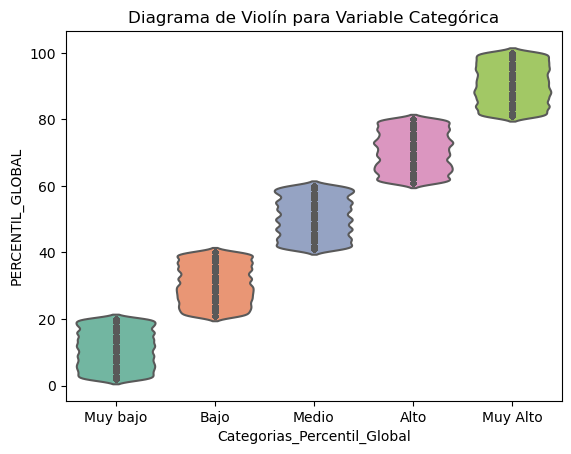

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# Reemplaza 'Categorias_Percentil_Global' con el nombre de tu columna categórica
sns.violinplot(x='Categorias_Percentil_Global', y = "PERCENTIL_GLOBAL", data=icfes, palette="Set2", inner="points")
plt.title('Diagrama de Violín para Variable Categórica')
plt.xlabel('Categorias_Percentil_Global')
plt.show()

***En en gráfico de violín obtenido se puede ver claramente la clasificación dada para esta variable categorica, donde se indican según el puntaje del percentil global obtenido su estado frente a nivel nacional, lo cuál es importante dado que se entiende de una manera más facíl el funcionamiento de esta variable.***

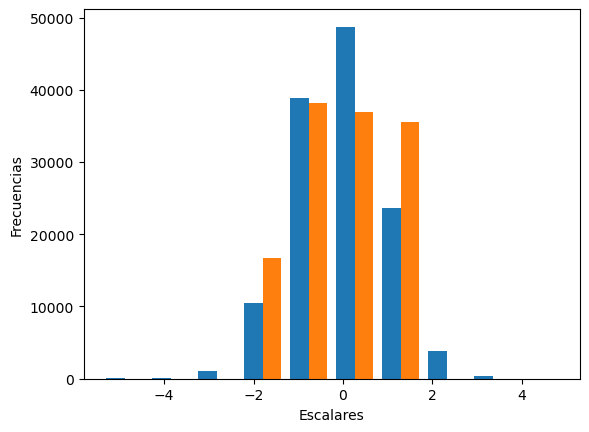

In [28]:
plt.hist(escalar)
plt.ylabel("Frecuencias")
plt.xlabel("Escalares")
plt.show()

***En el histograma desarrollado con los valores escalados se puede observar claramente la distribución de los datos, teniendo una distribución normal para los datos de PUNT_GlOBAL en la cual vemos que se está comportando de manera ideal en este gráfico, adicional a esto la distribución de PERCENTIL_GLOBAL es también normal, tiene una curvatura bastante ideal. Adicional a esto podemos observar que ambas variables tienen una correlación entre ellas y es de esperarse dado que una depende de la otra y se deben de correlacionar para determinar el rendimiento academico de los estudiantes.***

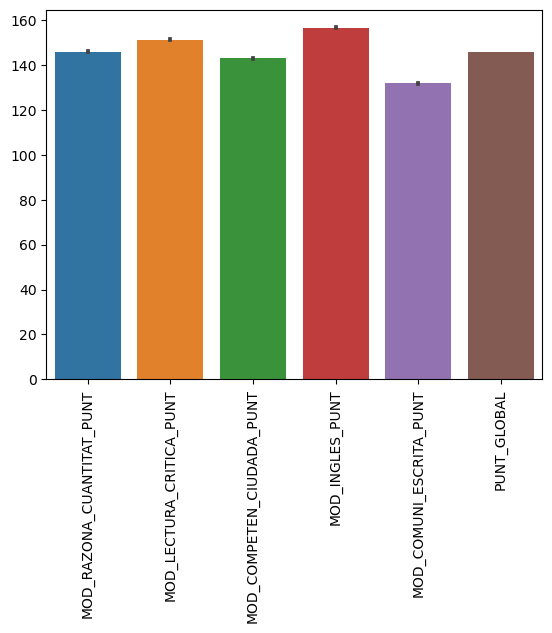

In [39]:
sns.barplot(icfes[["MOD_RAZONA_CUANTITAT_PUNT","MOD_LECTURA_CRITICA_PUNT","MOD_COMPETEN_CIUDADA_PUNT","MOD_INGLES_PUNT","MOD_COMUNI_ESCRITA_PUNT","PUNT_GLOBAL"]])
plt.xticks(rotation=90)
plt.show()

***En este gráfico de barras de todos los puntajes que se obtuvieron en las pruebas desarrolladas encontramos los promedios de todas las notas obtenidas obtenidas, se puede denotar que en el modulo de comunicación escrita fue donde peor puntaje obtuvieron los estudiantes, adicional a esto en el módulo de ingles fue el mejor puntaje promedio que se obtuvo, pero igualmente el puntaje general fue bastante bajo dado que se tiene un promedio de 145 a 150 aproximadamente lo cual es bajo para el rango entre 0 a 500 que se puede obtener en estas pruebas***

# **CONCLUSIONES**

- En el analisis desarrollado se pudo observar que los estudiantes a nivel general tuvieron un rendimiento academico bastante bajo, dado que el puntaje global promedio fue de 145.791695 que es bastante bajo para el rango de datos que contiene esta variable que va desde el 0 a 500.

- Se pudo observar que los percentiles globales también fueron muy malos, es algo de esperar por el bajo rendimiento de todos los estudiantes con estas prubas, donde este percentil tuvo como promedio puntaje de 50.

- Al momento de desarrollar el boxplot se tiene que hay algunos datos atipicos, los cuales puede deberse a algún error al momento de la calificación o perdida de datos.

- Los resultados bajos se deben en parte a las maneras de como se prepararon los estudiantes para estas pruebas y posiblemente tuvo un impacto muy grande.

- Se pudo desarrollar gráficos cientificos los cuales permitieron realizar analisis generales de las variables de interés que se buscaban analizar.

# DISCUSION GENERAL DE HALLAZGOS SIGNIFICATIVOS

En los hallazgos más significativos se tuvo que el promedio de calificaciones en todos los modulos fue bastante bajo, teniendo en cuenta que al ser una prueba de analisis de rendimiento general se debe de plantear un cambio en la forma de estudio, dado que si se puede observar en los estratos de los estudiantes todos son estrato 2, carácteristica que nos permite intuir que las personas no tienen como prepararse con pruebas o examenes que hacen empresas especializadas en el tema. Se puede utilizar gestión un poco más directa con los estudiantes utilizando herramientas tecnologicas que le permitan estudiar de manera autonoma, pero con pruebas parecidas a las saber pro y con esto poder tener una preparación ideal. Se observo que los estudiantes para las pruebas B11 la mayoría repasó por cuenta propia y con esto se espera que los estudiantes al estar en universidades no tengan el mismo tiempo y esta cantidad de repasos por cuenta propia aumenten su porción. Es preocupante la evaluación del nivel de los Núcleos Básicos de Conocimiento, dado que el puntaje fue bastante mediocre teniendo en cuenta la cantidad de profesiones que se presentaron a estas pruebas.

# **REFERENCIAS**
- Alex Galea. (2018). Applied Data Science with Python and Jupyter: Use Powerful Industry-standard Tools to Unlock New, Actionable Insights From Your Data: Vol. 1st edition. Packt Publishing. (pp. 29-49). https://bibliotecavirtual.unad.edu.co/login?url=https://search.ebscohost.com/login.aspx?direct=true&db=nlebk&AN=1925348&lang=es&site=ehost-live&ebv=EB&ppid=pp_29 
- Boschetti, A., & Massaron, L. (2016). Python Data Science Essentials - Second Edition (Vol. 0002). Packt Publishing. (pp. 124-134). https://bibliotecavirtual.unad.edu.co/login?url=https://search.ebscohost.com/login.aspx?direct=true&db=nlebk&AN=1409191&lang=es&site=ehost-live&ebv=EB&ppid=pp_124
- Samir Madhavan. (2015). Mastering Python for Data Science: Explore the World of Data Science Through Python and Learn How to Make Sense of Data. Packt Publishing. (pp. 77-106). https://bibliotecavirtual.unad.edu.co/login?url=https://search.ebscohost.com/login.aspx?direct=true&db=nlebk&AN=1058787&lang=es&site=ehost-live&ebv=EB&ppid=pp_77
- Subramanian, G. (2015). Python Data Science Cookbook. Packt Publishing. (pp. 85-126). https://bibliotecavirtual.unad.edu.co/login?https://search.ebscohost.com/login.aspx?direct=true&db=nlebk&AN=1098904&lang=es&site=ehost-live&ebv=EB&ppid=pp_85
- Thakur, A. (2016). Python: Real-World Data Science. Packt Publishing. (pp. 536 - 563). https://bibliotecavirtual.unad.edu.co/login?https://search.ebscohost.com/login.aspx?direct=true&db=nlebk&AN=1250754&lang=es&site=ehost-live&ebv=EB&ppid=pp_536